**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Shacha Parker<br/>
Student Number: 300235525

Name: Hasin Zaman<br/>
Student Number: 300148066

## 1. Exploratory Analysis

### Loading the dataset

A custom dataset has been created for this assignment. It has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Access and read the dataset directly from this GitHub repository in your Jupyter notebook.

You can use this code cell for you import statements and other initializations.

In [91]:
import numpy as np
import pandas as pd
import sklearn as sk

In [92]:
from sklearn.preprocessing import MinMaxScaler

url1 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_train.csv'
url2 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_valid.csv'
url3 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_test.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)
dataset3 = pd.read_csv(url3)

n1 = dataset1.shape[1]
n2 = dataset2.shape[1]
n3 = dataset3.shape[1]

dataset1.columns = range(n1)
dataset2.columns = range(n2)
dataset3.columns = range(n3)

# For convenience. display all data values.
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

Below are some testing functions; not critical to the program's function.

In [93]:
print(dataset1.describe())

                0             1             2             3             4    \
count  58290.000000  58290.000000  58290.000000  58290.000000  58290.000000   
mean       1.040333      0.081131      0.015958      0.056882      0.058845   
std        0.883747      0.170771      0.095076      0.154763      0.146986   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.000000      0.083300      0.000000      0.033300      0.047600   
max        2.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  58290.000000  58290.000000  58290.000000  58290.000000  58290.000000   
mean       0.039118      0.075580      0.022289      0.055314      0.054574   
std        0.133050      0.201986      0.096272    

In [94]:
print(dataset2.describe())

               0            1            2            3            4    \
count  7408.000000  7408.000000  7408.000000  7408.000000  7408.000000   
mean      1.083693     0.079510     0.012906     0.057040     0.056384   
std       0.865469     0.159702     0.073898     0.146571     0.132049   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       2.000000     0.080000     0.000000     0.039200     0.050000   
max       2.000000     1.000000     1.000000     1.000000     1.000000   

               5            6            7            8            9    \
count  7408.000000  7408.000000  7408.000000  7408.000000  7408.000000   
mean      0.041719     0.076848     0.020695     0.051402     0.054837   
std       0.127555     0.191964     0.082013     0.130175     0.125946   
min       0.000000     0.000000     0

In [95]:
print(dataset3.describe())

               0            1            2            3            4    \
count  7431.000000  7431.000000  7431.000000  7431.000000  7431.000000   
mean      1.070381     0.079864     0.014470     0.055806     0.063270   
std       0.863667     0.166373     0.081464     0.147658     0.149395   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       2.000000     0.076900     0.000000     0.036800     0.057100   
max       2.000000     1.000000     1.000000     1.000000     1.000000   

               5            6            7            8            9    \
count  7431.000000  7431.000000  7431.000000  7431.000000  7431.000000   
mean      0.037149     0.073311     0.020754     0.057695     0.057168   
std       0.123875     0.194706     0.089513     0.142720     0.134736   
min       0.000000     0.000000     0

In [96]:
print(dataset1.iloc[0])

0      2.0000
1      0.0000
2      0.0000
3      0.0000
4      0.0000
5      0.0000
6      0.0000
7      0.0000
8      0.0000
9      0.0000
10     0.0000
11     0.0000
12     0.0000
13     0.0000
14     0.3333
15     0.0000
16     0.0000
17     0.3333
18     0.3333
19     0.0000
20     0.0000
21     0.0000
22     0.0000
23     0.0000
24     0.0000
25     0.0000
26     0.0000
27     0.0000
28     0.0000
29     0.0000
30     0.0000
31     0.0000
32     1.0000
33     0.0000
34     0.0000
35     0.0000
36     0.0000
37     0.0000
38     0.0000
39     0.0000
40     0.0000
41     0.0000
42     0.0000
43     0.0000
44     0.0000
45     0.0000
46     0.0000
47     0.0000
48     0.0000
49     0.0000
50     0.0000
51     0.0000
52     0.0000
53     0.0000
54     0.0000
55     0.0000
56     0.3333
57     0.0000
58     0.0000
59     0.0000
60     0.0000
61     0.6667
62     0.0000
63     0.0000
64     0.0000
65     0.0000
66     0.0000
67     0.0000
68     0.0000
69     0.0000
70     0.0000
71    

In [97]:
print(dataset1.head())

   0       1    2       3       4    5       6       7       8       9    10   \
0    2  0.0000  0.0  0.0000  0.0000  0.0  0.0000  0.0000  0.0000  0.0000  0.0   
1    2  0.1905  0.0  0.3333  0.0000  0.0  0.0000  0.0000  0.0000  0.2857  0.0   
2    2  0.0225  0.0  0.0112  0.1348  0.0  0.0112  0.1348  0.0112  0.1685  0.0   
3    2  0.0000  0.0  0.0000  0.0000  0.0  0.0000  0.0000  0.0000  0.0000  0.0   
4    0  0.0000  0.0  0.0000  0.0000  0.0  0.0000  0.0000  0.0000  0.3333  0.0   

   11      12      13      14      15      16      17      18      19   \
0  0.0  0.0000  0.0000  0.3333  0.0000  0.0000  0.3333  0.3333  0.0000   
1  0.0  0.0000  0.0000  0.0000  0.0952  0.0000  0.0000  0.0000  0.0000   
2  0.0  0.0562  0.0000  0.1124  0.1910  0.0674  0.0225  0.0337  0.0112   
3  0.0  0.0000  0.3333  0.0000  0.0000  0.6667  0.0000  0.0000  0.0000   
4  0.0  0.0000  0.6667  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   

      20      21   22      23   24      25      26      27      28  

### Data Pre-Processing

2. **Shuffling the Rows**:

    - Since examples are generated by sliding a window across each protein sequence, most adjacent examples originate from the same protein and share 20 positions. To mitigate the potential negative impact on model training, the initial step involves shuffling the **rows** of the data matrix.

In [98]:
# Assume *all* datasets should be suffled.

dataset1 = dataset1.sample(frac = 1)
dataset2 = dataset2.sample(frac = 1)
dataset3 = dataset3.sample(frac = 1)

3. **Scaling of Numerical Features**:

    - Since all 462 features are proportions represented as values between 0 and 1, scaling may not be necessary. In our evaluations, using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) actually degraded model performance. Within your pipeline, compare the effects of not scaling the data versus applying [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). In the interest of time, a single experiment will suffice. It is important to note that when scaling is applied, a uniform method should be used across all columns, given their homogeneous nature.

In [99]:
scaler = sk.preprocessing.MinMaxScaler()

In [100]:
dataset1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462
count,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58

In [101]:
dataset1_scaled = pd.DataFrame(scaler.fit_transform(dataset1), columns=dataset1.columns)

dataset1_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462
count,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58290.000000,58

In [102]:
dataset2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462
count,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.00000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000

In [103]:
dataset2_scaled = pd.DataFrame(scaler.fit_transform(dataset2), columns=dataset2.columns)

dataset2_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462
count,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.00000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000

In [104]:
dataset3.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462
count,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.00000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000

In [105]:
dataset3_scaled = pd.DataFrame(scaler.fit_transform(dataset3), columns=dataset3.columns)

dataset3_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462
count,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.00000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000,7431.000

4. **Isolating the Target and the Data**:

    - In the CSV files, the target and data are combined. To prepare for our machine learning experiments, separate the training data $X$ and the target vector $y$ for each of the three datasets.

In [106]:
# Separate features and target for dataset1
X1 = dataset1.iloc[:, 1:]  # All columns except the first
y1 = dataset1.iloc[:, 0]   # First column as target

# Separate features and target for dataset2
X2 = dataset2.iloc[:, 1:]
y2 = dataset2.iloc[:, 0]

# Separate features and target for dataset3
X3 = dataset3.iloc[:, 1:]
y3 = dataset3.iloc[:, 0]

# Optional: Display the shapes to confirm
print("dataset1 shapes:", X1.shape, y1.shape)
print("dataset2 shapes:", X2.shape, y2.shape)
print("dataset3 shapes:", X3.shape, y3.shape)

dataset1 shapes: (58290, 462) (58290,)
dataset2 shapes: (7408, 462) (7408,)
dataset3 shapes: (7431, 462) (7431,)


### Model Development & Evaluation

5. **Model Development**:

    - **Dummy Model**: Implement a model utilizing the [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). This model disregards the input data and predicts the majority class. Such model is sometimes called a straw man model.

    - **Basline Model**: As a baseline model, select one of the previously studied machine learning algorithms: Decision Trees, K-Nearest Neighbors (KNN), or Logistic Regression. Use the default parameters provided by scikit-learn to train each model as a baseline. Why did you choose this particular classifier? Why do you think it should be appropriate for this specific task?

    - **Neural Network Model**: Utilizing [Keras](https://keras.io) and [TensorFlow](https://www.tensorflow.org), construct a sequential model comprising an input layer, a hidden layer, and an output layer. The input layer should consist of 462 nodes, reflecting the 462 attributes of each example. The hidden layer should include 8 nodes and employ the default activation function. The output layer should contain three nodes, corresponding to the three classes: helix (0), sheet (1), and coil (2). Apply the softmax activation function to the output layer to ensure that the outputs are treated as probabilities, with their sum equaling 1 for each training example.

    We therefore have three models: dummy, baseline, and neural network.

#### Dummy Model Set up

In [107]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier()

dummy_classifier.fit(X1, y1)

DummyClassifier()

#### Baseline Models Set Up

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
log_reg_classifier = LogisticRegression(random_state=420)
log_reg_classifier.fit(X1, y1)

LogisticRegression(random_state=420)

#### Neural Network

In [110]:
import torch

class Model(torch.nn.Module):
    def __init__(self, hidden_layers = [10], activations = ["relu"], initialization = "random", dropout_rate=0.0):
        super(Model, self).__init__()

        # Input -> input_layer(462) -(activations[0])-> hidden_layers[0] -> ... -(activations[-1])-> hidden_layers[-1] -(softmax)-> output_layer(3) -> Output
        self.input_layer = torch.nn.Linear(462, hidden_layers[0])
        initialize_layer(self.input_layer, initialization)

        self.hidden_layers = torch.nn.ModuleList()
        for i in range(len(hidden_layers) - 1):
            layer = torch.nn.Linear(hidden_layers[i], hidden_layers[i + 1])
            initialize_layer(layer, initialization)
            self.hidden_layers.append(layer)
            if dropout_rate != 0.0:
                self.dropout_layers.append(torch.nn.Dropout(dropout_rate))
        
        self.activations = []
        for activation in activations:
            match activation:
                case "relu":
                    self.activations.append(torch.nn.ReLU())
                case "leaky_relu":
                    self.activations.append(torch.nn.LeakyReLU())
                case "sigmoid":
                    self.activations.append(torch.nn.Sigmoid())
                case "tanh":
                    self.activations.append(torch.nn.Tanh())
                case "elu":
                    self.activations.append(torch.nn.ELU())
                case "gelu":
                    self.activations.append(torch.nn.GELU())
                case "swish":
                    self.activations.append(torch.nn.Hardswish())
                case _:
                    raise ValueError(f"Unsupported activation: {activation}")

        self.soft_max = torch.nn.Softmax()

        self.output_layer = torch.nn.Linear(hidden_layers[-1], 3)
        initialize_layer(self.output_layer, initialization)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activations[0](x)

        for i, layer in enumerate(self.hidden_layers):
            x = layer(x)
            x = self.activations[i + 1](x)
        
        return self.output_layer(self.soft_max(x))
    
def initialize_layer(layer, initialization):
    match initialization:
        case "random":
            torch.nn.init.normal_(layer.weight)
        case "xavier":
            torch.nn.init.xavier_uniform_(layer.weight)
        case "he":
            torch.nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        case "zeros":
            torch.nn.init.zeros_(layer.weight)
        case _:
            raise ValueError(f"Unsupported initialization: {initialization}")

    if layer.bias is not None:
        torch.nn.init.zeros_(layer.bias)

def to_label(x):
    label = ["helix", "sheet", "coil"]

    vals = list(zip(label,map(float, list(x))))

    vals.sort(key=lambda x: x[1])

    return vals[-1][0]

def to_id(x):
    ids = range(3)

    vals = list(zip(ids,map(float, list(x))))

    vals.sort(key=lambda x: x[1])

    return vals[-1][0]




6. **Model Evaluation**:

    - Employ cross-validation to assess the performance of the baseline model. Select a small number of folds to prevent excessive computational demands.

#### Dummy Model

In [111]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd

metrics = [accuracy_score, f1_score, precision_score, recall_score]

In [112]:
X1[0:1].shape

(1, 462)

In [113]:
dummy_pred = dummy_classifier.predict(X2)
dummy_score = pd.DataFrame(
    [
        [
            accuracy_score(dummy_pred, y2),
            f1_score(dummy_pred, y2, average="micro"),
            recall_score(dummy_pred, y2, average="micro"),
            precision_score(dummy_pred, y2, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
dummy_score

,Accuracy,F1 Score,Recall,Precision
0,0.419816,0.419816,0.419816,0.419816


#### Baseline Models

In [114]:
log_reg_pred = log_reg_classifier.predict(X2)
log_reg_pred = pd.DataFrame(
    [
        [
            accuracy_score(dummy_pred, y2),
            f1_score(dummy_pred, y2, average="micro"),
            recall_score(dummy_pred, y2, average="micro"),
            precision_score(dummy_pred, y2, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
log_reg_pred

,Accuracy,F1 Score,Recall,Precision
0,0.419816,0.419816,0.419816,0.419816


#### Neural Network

    - **Training neural networks can be time-consuming.** Consequently, their performance is typically assessed once using a validation set. Make sure to not use the test set until the very end of the assignment.

In [115]:
from torch.utils.data import DataLoader, TensorDataset

def prediction(model, X, y, device, batch_size=500, output_id = True):
    X = torch.tensor(X.values).float().to(device)
    y = torch.tensor(y.values).long().to(device)

    dataset = TensorDataset(X, y)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    predictions = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            if output_id:
                batch_predictions = torch.argmax(outputs, dim=-1)

                predictions.extend(batch_predictions.cpu().numpy())
            else:
                predictions.extend(outputs.cpu())

    return predictions

In [116]:
from torch.utils.data import DataLoader, TensorDataset

def train(model, training, loss_func, optimizer, testing=None, learning_rate = 0.001, epochs = 1, batch_size = -1, device=torch.device("cpu"), shuffle=False):
    optimizer = optimizer(model.parameters(), lr=learning_rate)
    X, y = training
    X= torch.tensor(X.values, dtype=torch.float32).to(device)
    y = torch.tensor(y.values, dtype=torch.int64).to(device)

    num_classes = 3

    

    if batch_size == -1:
        batch_size = len(training[0])
        
    loss_history  = []
    if testing is not None:
        # Placeholder big number
        loss = 9999999999999999999999999999999999999999999999.
    for epoch in range(epochs):
        dataset = TensorDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

        for batch_X, batch_y in data_loader:

            optimizer.zero_grad()

            # print(batch_X)
            batch_y = torch.nn.functional.one_hot(batch_y, num_classes=num_classes).float()
            # print(batch_y)

            predictions = model(batch_X)

            # print(predictions)

            loss = loss_func(predictions, batch_y)

            loss.backward()
            optimizer.step()
        
        if testing is not None:
            test_input, test_label = testing

            with torch.no_grad():
                if len(loss_history ) > 1:
                    predictions = torch.stack(prediction(model, test_input, test_label, device, batch_size = len(test_input), output_id=False))
                    loss_history.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(test_label).long(), num_classes=3))))

                    # Last loss values > Second loss value -> loads last checkpoint and stops training 
                    if loss_history [-1] > loss_history [-2]:
                        return
                

In [117]:
model = Model([8], ["relu"])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device=device)

train(model, (X1, y1), torch.nn.L1Loss(), torch.optim.Rprop, device=device, epochs=5, learning_rate=0.1)

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [118]:
predictions = prediction(model, X2, y2, device)

model_score = pd.DataFrame(
    [
        [
            accuracy_score(predictions, y2),
            f1_score(predictions, y2, average="micro"),
            recall_score(predictions, y2, average="micro"),
            precision_score(predictions, y2, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)

model_score

,Accuracy,F1 Score,Recall,Precision
0,0.419816,0.419816,0.419816,0.419816


    - Assess the models using metrics such as precision, recall, and F1-score.

### Hyperparameter Optimization

7. **Baseline Model:**

    - To ensure a fair comparison for our baseline model, we will examine how varying hyperparameter values affect its performance. This prevents the erroneous conclusion that neural networks inherently perform better, when in fact, appropriate hyperparameter tuning could enhance the baseline model's performance.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [119]:
from matplotlib.pyplot import matshow

In [120]:
penalties = ['l2', None] #l1 & elasticnet doesn't work
max_iters = [n for n in range(10, 200, 10)]
tols = [float(n)/100_000.0 for n in range(100, 1000, 100)]

scores = []

for penalty in penalties:
    scores.append([])
    for max_iter in max_iters:
        scores[-1].append([])
        for tol in tols:
            log_reg_class = LogisticRegression(penalty=penalty, max_iter=max_iter, tol=tol, n_jobs=-1, random_state=420)
            log_reg_class.fit(X1, y1)

            scores[-1][-1].append(tuple([
                m(
                    log_reg_class.predict(X2),
                    y2,
                    average="micro"
                ) if m.__name__ != "accuracy_score" else
                m(
                    log_reg_class.predict(X2),
                    y2
                ) for m in metrics
            ]))

            # scores[-1][-1].append(tuple([m(log_reg_class.predict(X2), y2) for m in metrics]))

l2
accuracy_score


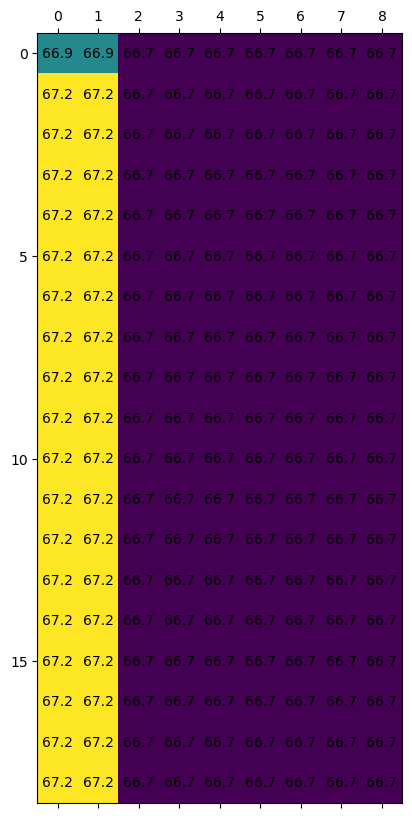

f1_score


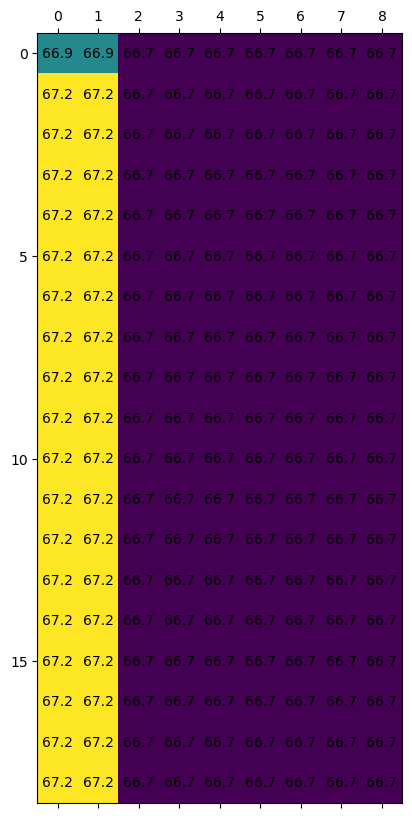

precision_score


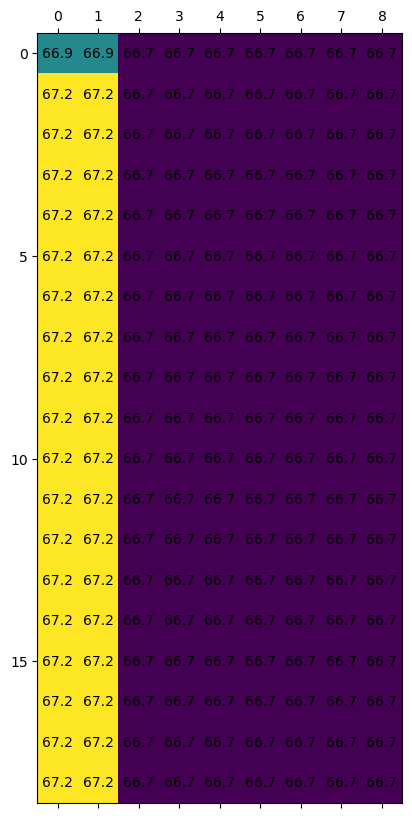

recall_score


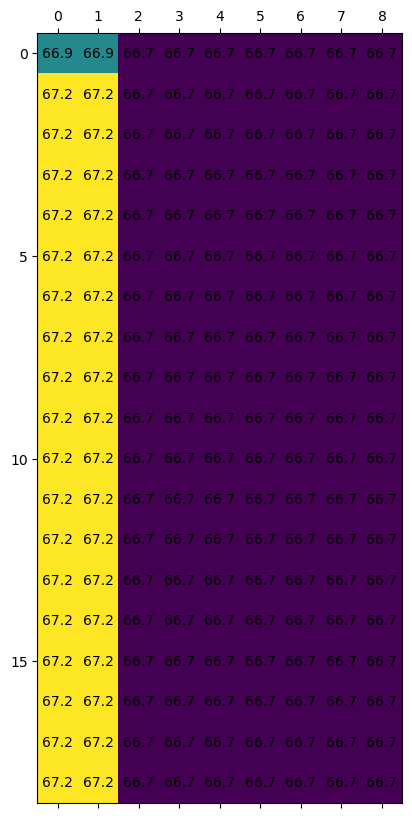

None
accuracy_score


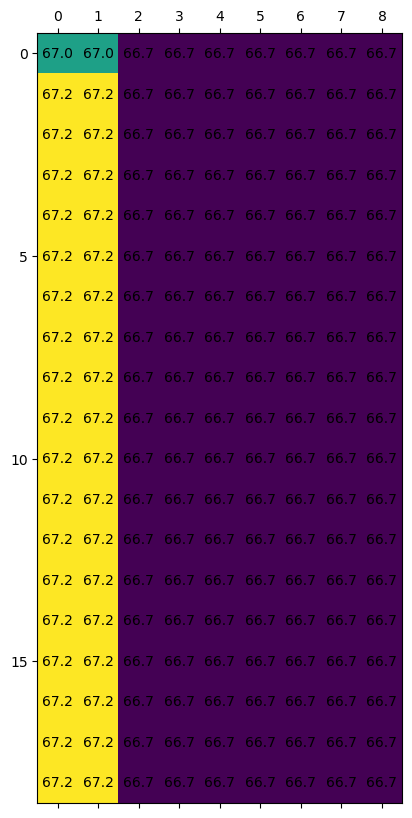

f1_score


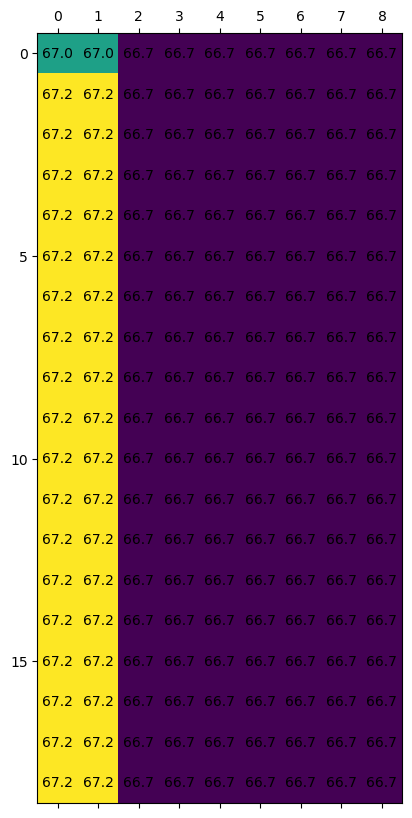

precision_score


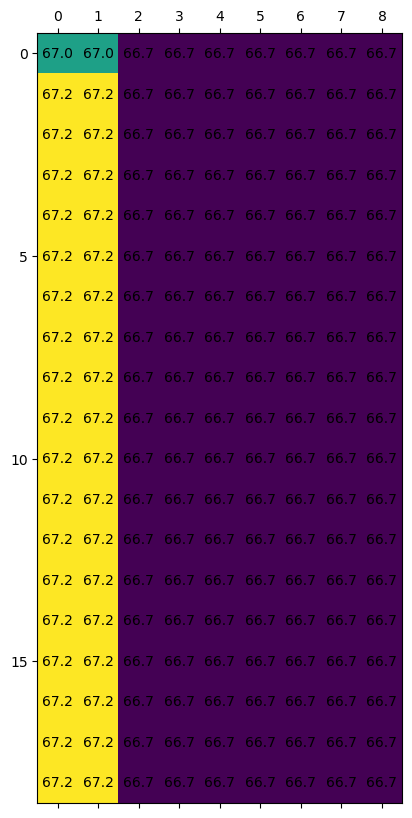

recall_score


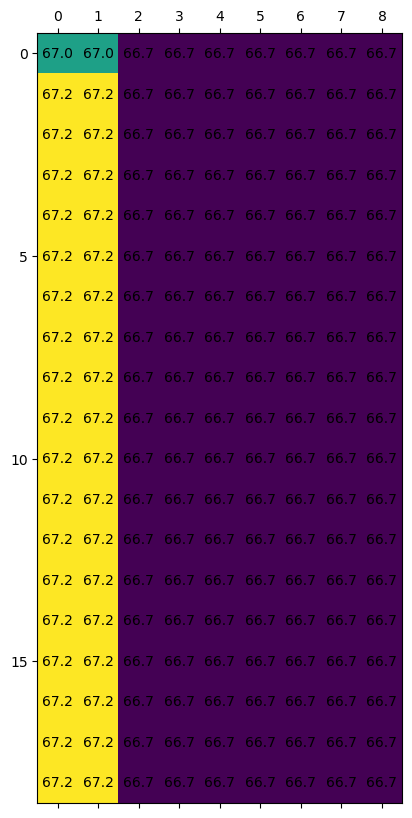

In [121]:
from matplotlib.pyplot import matshow
import matplotlib.pyplot as plt

for i, penalty in enumerate(penalties):
    print(penalty)
    for l, metric in enumerate(metrics):
        print(metric.__name__)
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.matshow([[scores[i][x][y][l] for y, _ in enumerate(scores[i][x])] for x, _ in enumerate(scores[i])])
        for j, _ in enumerate(scores[i]):
            for k, _ in enumerate(scores[i][j]):
                ax.text(k, j, f'{scores[i][j][k][l]*100:0.1f}', ha='center', va='center',)
        plt.show()

From the grid search - the ideal settings for the logistic regression are:
    - Penalty: None
    - Iterations: 10
    - Tol: 100/100_000 - 200/100_000

Indicating that the selected baseline model begins degrade due to over-fitting when the iterations become greater than 10. Any tol greater than 200/100_000 will be too high to effectively learn.

8. **Neural Network:**

    In our exploration and tuning of neural networks, we focus on the following hyperparameters:

    - **Single hidden layer, varying the number of nodes**. 

        - Start with a single node in the hidden layer. Use a graph to depict the progression of loss and accuracy for both the training and validation sets, with the horizontal axis representing the number of training epochs and the vertical axis showing loss and accuracy. Training this network should be relatively fast, so let's conduct training for 50 epochs. Observing the graph, what do you conclude? Is the network underfitting or overfitting? Why?

        - Repeat the above process using 2 and 4 nodes in the hidden layer. Use the same type of graph to document your observations regarding loss and accuracy.

        - Start with 8 nodes in the hidden layer and progressively double the number of nodes until it surpasses the number of nodes in the input layer. This results in seven experiments and corresponding graphs for the following configurations: 8, 16, 32, 64, 128, 256, and 512 nodes. Document your observations throughout the process.
        
        - Ensure that the **number of training epochs** is adequate for **observing an increase in validation loss**. **Tip**: During model development, start with a small number of epochs, such as 5 or 10. Once the model appears to perform well, test with larger values, like 40 or 80 epochs, which proved reasonable in our tests. Based on your observations, consider conducting further experiments, if needed. How many epochs were ultimately necessary?

In [122]:
nodes = [2**i for i in range(1,10)] + [x for x in range(200, 1000, 100)] #The second list to check if the test loss surpass training loss - indicating overfitting
nodes.sort()
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
for node in nodes:
    model = Model(hidden_layers = [node], activations = ["relu"])
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Note: Since an ideal epoch test was conducted later - the epoch for this experiment was kept at 5
    train(model, (X1, y1), torch.nn.L1Loss(), torch.optim.Rprop, epochs=5, learning_rate=0.1, device=device, shuffle=True)

    model.eval()
    with torch.no_grad():
        loss_func = torch.nn.L1Loss()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3))))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3))))


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension c

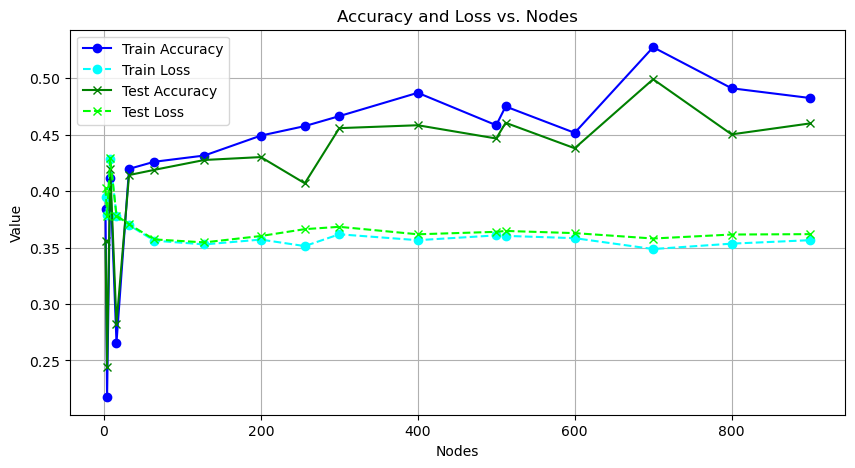

In [123]:
plt.figure(figsize=(10, 5))

plt.plot(nodes, train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(nodes, train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(nodes, test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(nodes, test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Nodes')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. Nodes')
plt.legend()
plt.grid(True)

In [124]:
best_nodes = 256

The graph indicates that the model performance better with more nodes per layer. However, the rate of change begins to plateau around 256 nodes. Dips after 256 nodes could because of underfitting issues and could be resolved with more epochs and smaller learning rate.

Therefore, to 256 nodes were selected. As larger models won't provide too much benefit and will only cost longer computation costs.

    - **Varying the number of layers**.

        - Conduct similar experiments as described above, but this time vary the number of layers from 1 to 4. Document your findings.

        - How many nodes should each layer contain? Test at least two scenarios. Traditionally, a common strategy involved decreasing the number of nodes from the input layer to the output layer, often by halving, to create a pyramid-like structure. However, recent experience suggests that maintaining a constant number of nodes across all layers can perform equally well. Describe your observations. It is acceptable if both strategies yield similar performance results.

        - Select one your models that exemplifies overfitting. In our experiments, we easily constructed a model achieving nearly 100% accuracy on the training data, yet showing no similar improvement on the validation set. Present this neural network along with its accuracy and loss graphs. Explain the reasoning for concluding that the model is overfitting.

In [125]:
layers = [i for i in range(1,5)]
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
for layer in layers:
    model = Model(hidden_layers = [best_nodes]*layer, activations = ["relu"]*layer)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train(model, (X1, y1), torch.nn.L1Loss(), torch.optim.Rprop, epochs=10, learning_rate=0.1, device=device, shuffle=True)
    
    model.eval()
    with torch.no_grad():
        loss_func = torch.nn.L1Loss()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3))))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3))))


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension c

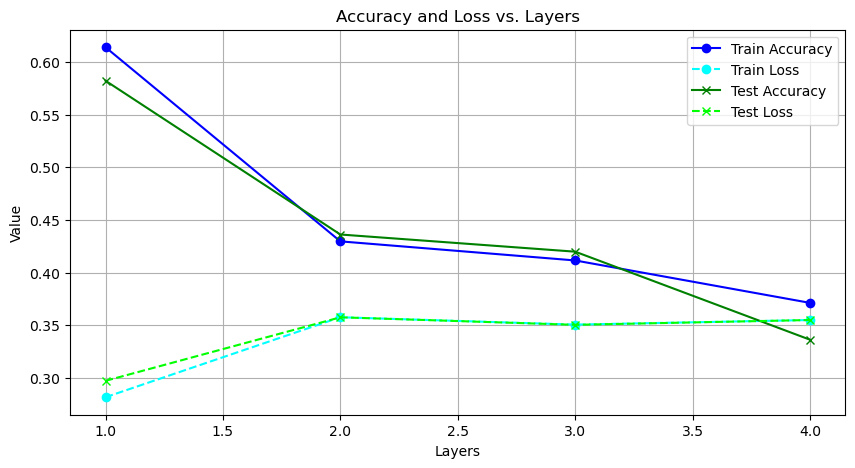

In [126]:
plt.figure(figsize=(10, 5))

plt.plot(layers, train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(layers, train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(layers, test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(layers, test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Layers')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. Layers')
plt.legend()
plt.grid(True)

Pyramid structure

In [127]:
layers = [i for i in range(1,8)]
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
for layer in layers:
    print(layer)
    model = Model(
        hidden_layers = [int(best_nodes / (2 ** i)) for i in range(layer)],
        activations = ["relu"]*layer
    )
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train(model, (X1, y1), torch.nn.L1Loss(), torch.optim.Rprop, epochs=10, learning_rate=0.1, device=device, shuffle=True, batch_size=32)
    
    model.eval()
    with torch.no_grad():
        loss_func = torch.nn.L1Loss()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3))))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3))))

1


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


2


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


3


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


4


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


5


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


6


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


7


d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


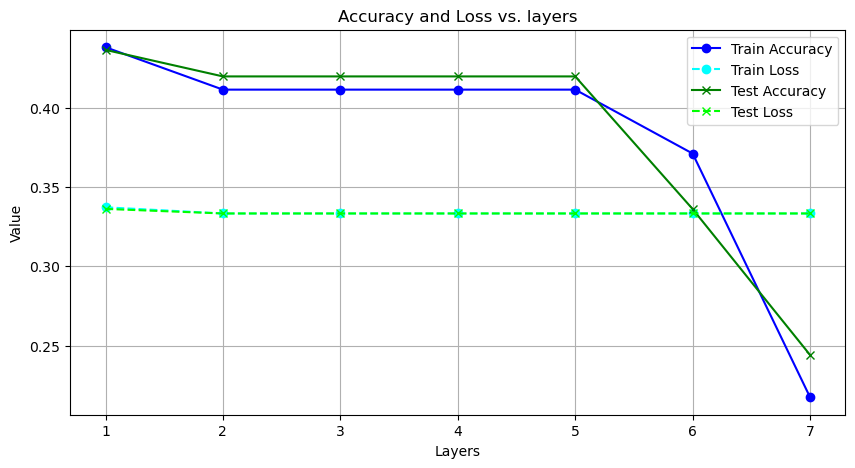

In [128]:
plt.figure(figsize=(10, 5))

plt.plot(layers, train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(layers, train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(layers, test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(layers, test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Layers')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. layers')
plt.legend()
plt.grid(True)

In [129]:
best_layers = 1

After running the experiment twice - one pyramid architecture and the other with constant layer size.

The pyramid structure took twice as long computer compared to the constant layer size - with little to no difference.

Therefore, only one layer was selected with a constant layer size.

    - **Activation function**.

        - Present results for one of the configurations mentioned above by varying the activation function. Test at least `relu` (the default) and `sigmoid`. The choice of the specific model, including the number of layers and nodes, is at your discretion. Document your observations accordingly.

In [130]:
activation_func = ["relu", "leaky_relu", "sigmoid", "tanh", "elu", "gelu", "swish"]

train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
for func in activation_func:
    model = Model(hidden_layers = [best_nodes]*best_layers, activations = [func]*best_layers)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train(model, (X1, y1), torch.nn.L1Loss(), torch.optim.Rprop, epochs=5, learning_rate=0.1, device=device, shuffle=True)
    
    model.eval()
    with torch.no_grad():
        loss_func = torch.nn.L1Loss()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3))))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3))))

    model.eval()

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension c

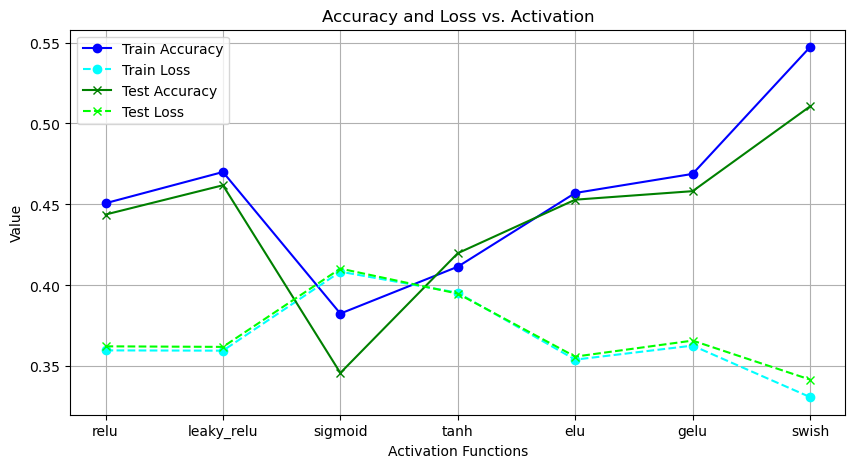

In [131]:
plt.figure(figsize=(10, 5))

plt.plot(activation_func, train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(activation_func, train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(activation_func, test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(activation_func, test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Activation Functions')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. Activation')
plt.legend()
plt.grid(True)

In [132]:
best_activation = "swish"

After running this experiment multiple times. The activations function varies in terms of performance. However, ELU, GELU, SWISH contently performed fairly well - jostling for first, second and third. Sigmoid and Tanh performs the worst compared to the others. SWISH was selected for the least loss. However, GELU would be a strong runner up for having the highest accuracy.

    - **Regularization** in neural networks is a technique used to prevent overfitting.

        - One technique involves adding a penalty to the loss function to discourage excessively complex models. Apply an `l2` penalty to some or all layers. Exercise caution, as overly aggressive penalties have been problematic in our experiments. Begin with the default `l2` value of 0.01, then reduce it to 0.001 and 1e-4. Select a specific model from the above experiments and present a case where you successfully reduced overfitting. Include a pair of graphs comparing results with and without regularization. Explain your rationale to conclude that overfitting has been reduced. Do not expect to completely eliminate overfitting. Again, this is a challenging dataset to work with.

In [133]:
loss_funcs = [torch.nn.L1Loss, torch.nn.MSELoss, torch.nn.CrossEntropyLoss]

train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
for func in loss_funcs:
    model = Model(hidden_layers = [best_nodes]*best_layers, activations = [best_activation]*best_layers)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train(model, (X1, y1), func(), torch.optim.Rprop, epochs=5, learning_rate=0.1, device=device, shuffle=True)
    
    model.eval()
    with torch.no_grad():
        loss_func = func()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3).float())))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3).float())))

    model.eval()

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension c

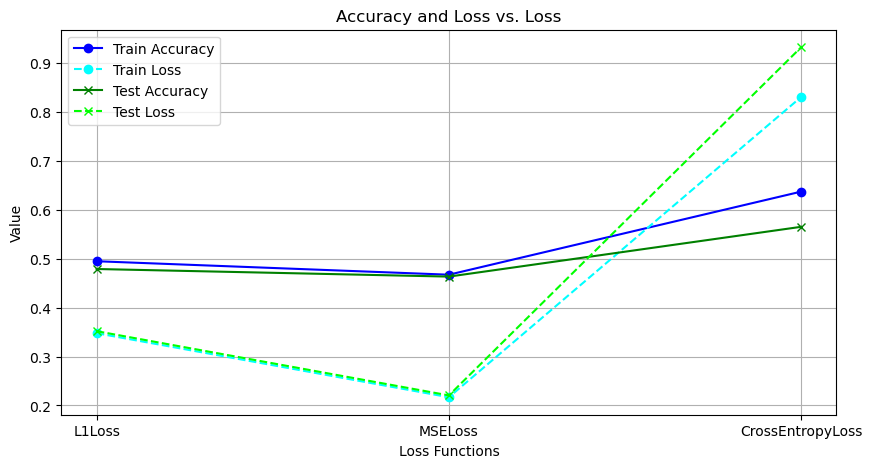

In [134]:
plt.figure(figsize=(10, 5))

plt.plot(list(map(lambda x: x.__name__, loss_funcs)), train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(list(map(lambda x: x.__name__, loss_funcs)), train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(list(map(lambda x: x.__name__, loss_funcs)), test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(list(map(lambda x: x.__name__, loss_funcs)), test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Loss Functions')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. Loss')
plt.legend()
plt.grid(True)

In [135]:
best_loss_func = torch.nn.MSELoss

Out of all the loss functions. MSELoss works the best. Which, is the square root norm of L2 loss.

As a result, MSELoss was selected over L1Loss.

        - Dropout layers are a regularization technique in neural networks where a random subset of neurons is temporarily removed during training. This helps prevent overfitting by promoting redundancy and improving the network's ability to generalize to new data. Select a specific model from the above experiments where you have muliple layers and experiment adding one or of few dropout layers into your network. Experiment with two different rates, say 0.25 and 0.5. Document your observations.

In [136]:
dropouts = [float(i) / 100. for i in range(0,101, 5)]

train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
for dropout in dropouts:
    model = Model(hidden_layers = [best_nodes]*best_layers, activations = [best_activation]*best_layers, dropout_rate=dropout)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train(model, (X1, y1), best_loss_func(), torch.optim.Rprop, epochs=5, learning_rate=0.1, device=device, shuffle=True)
    
    model.eval()
    with torch.no_grad():
        loss_func = best_loss_func()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3).float())))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3).float())))

    model.eval()

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension c

[(0.15, 0.5063444924406048), (0.7, 0.5163336933045356), (0.35, 0.5329373650107991)]


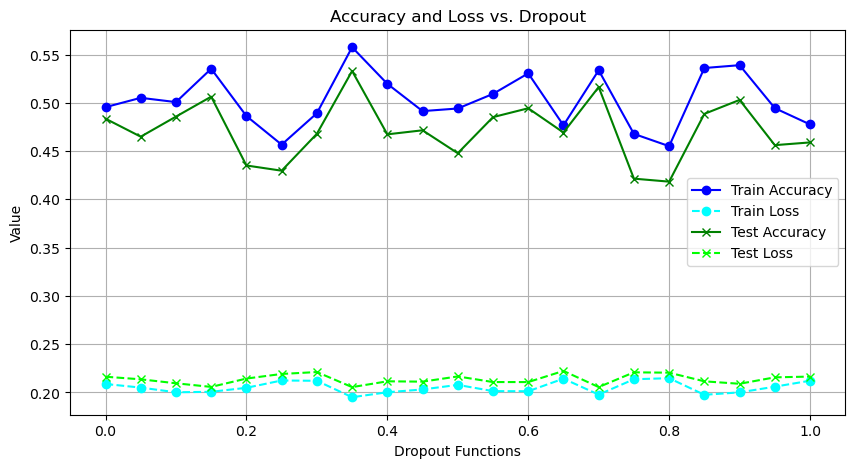

In [137]:
plt.figure(figsize=(10, 5))

plt.plot(dropouts, train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(dropouts, train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(dropouts, test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(dropouts, test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Dropout Functions')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. Dropout')
plt.legend()

smallest_val = sorted(list(zip(dropouts, test_accuracy)), key=lambda x: x[1])[-3:]
print(smallest_val)
plt.grid(True)

In [138]:
best_drop_out = 0.2

Dropout rate doesn't affect the model much as the dropout rate increases. Indicating that, the model might not have enough layers or neurons to be affected by dropout layer. Which, makes sense as there is only one hidden layer - turning it off just means the model wont be trained with a given input batch.

As a result, the highest performing dropout rate of 0.2 was selected.

        - Early stopping is a regularization technique in neural network training wherein the process is halted when validation set performance starts to decline, thus preventing overfitting by avoiding the learning of noise in the training data. From all the experiments conducted thus far, choose **one** configuration (the number of layers, number of nodes, activation function, L2 penalty, and dropout layers) that yielded the best performance. Use a graph of loss and accuracy to determine the optimal number of training iterations for this network. What is the optimal number of epochs for this network configuration and why?

In [139]:
epochs = list(range(5, 50, 5))
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []


for epoch in epochs:
    
    model = Model(hidden_layers = [best_nodes]*best_layers, activations = [best_activation]*best_layers, dropout_rate=best_drop_out)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train(model, (X1, y1), best_loss_func(), torch.optim.Rprop, epochs=epoch, learning_rate=0.1, device=device, shuffle=True, testing=(X2, y2))
    
    model.eval()
    with torch.no_grad():
        loss_func = best_loss_func()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3).float())))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3).float())))

    model.eval()

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension c

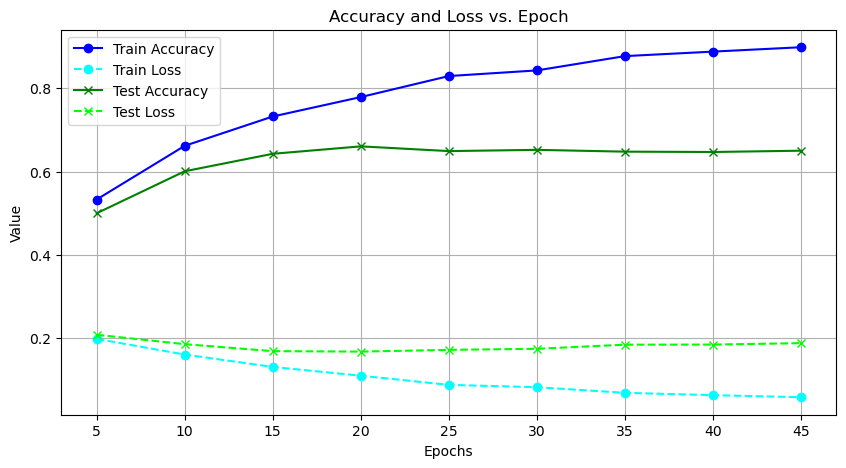

In [140]:
plt.figure(figsize=(10, 5))

plt.plot(epochs, train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(epochs, train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(epochs, test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(epochs, test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. Epoch')
plt.legend()

plt.grid(True)

In [141]:
best_epochs = 15

The model tends to plataea after 10 epochs. Begins to over-fit on the training dataset after 15-20 epochs. Indicating that the training stops training after 15-20 epochs - when the testing loss begins to increase. Therefore, 15 epochs were selected as the ideal number of epochs to get the best performance, without over-fitting and saving time.

        - Summarize your experiments with using a graphical representation such as Figure 6.15 [on this page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

In [142]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

model = Model(hidden_layers = [best_nodes]*best_layers, activations = [best_activation]*best_layers, dropout_rate=best_drop_out)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
for epoch in range(best_epochs):
    model.train()
    train(model, (X1, y1), best_loss_func(), torch.optim.Rprop, epochs=1, learning_rate=0.1, device=device, shuffle=True, testing=(X2, y2))
    
    model.eval()
    with torch.no_grad():
        loss_func = best_loss_func()


        predictions = prediction(model, X1, y1, device, batch_size = len(X2))
        train_accuracy.append(
            accuracy_score(predictions, y1)
        )
        predictions = torch.stack(prediction(model, X1, y1, device, batch_size = len(X1),output_id=False))
        train_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y1).long(), num_classes=3).float())))


        predictions = prediction(model, X2, y2, device, batch_size = len(X2))
        test_accuracy.append(
            accuracy_score(predictions, y2)
        )
        predictions = torch.stack(prediction(model, X2, y2, device, batch_size = len(X2),output_id=False))
        test_loss.append(float(loss_func(predictions, torch.nn.functional.one_hot(torch.tensor(y2).long(), num_classes=3).float())))

        

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension c

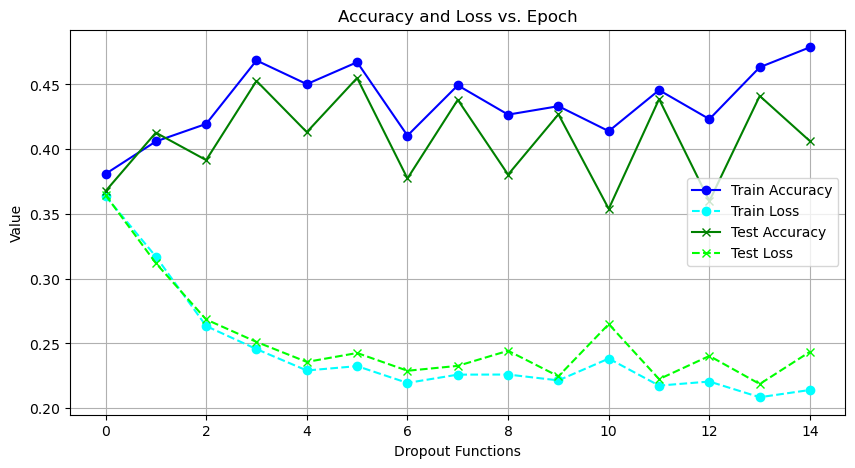

In [143]:
plt.figure(figsize=(10, 5))

plt.plot(list(range(best_epochs)), train_accuracy, marker='o', color='blue', label='Train Accuracy')
plt.plot(list(range(best_epochs)), train_loss, marker='o', color='cyan', linestyle='--', label='Train Loss')

plt.plot(list(range(best_epochs)), test_accuracy, marker='x', color='green', label='Test Accuracy')
plt.plot(list(range(best_epochs)), test_loss, marker='x', color='lime', linestyle='--', label='Test Loss')

plt.xlabel('Dropout Functions')
plt.ylabel('Value')
plt.title('Accuracy and Loss vs. Epoch')
plt.legend()

plt.grid(True)

### Test

9. **Model Comparison**:

    - Evaluate the baseline model on the test set, using the optimal parameter set identified through grid search. Additionally, apply your best-performing neural network configuration to the test set.

    - Quantify the performance of the baseline model (best hyperparameter configuration) and your neural network (best configuration) using precision, recall, and F1-score as metrics. How do these two models compare to the dummy model?

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

#### Dummy Model

Testing dataset

In [144]:
dummy_pred = dummy_classifier.predict(X2)
dummy_score = pd.DataFrame(
    [
        [
            accuracy_score(dummy_pred, y2),
            f1_score(dummy_pred, y2, average="micro"),
            recall_score(dummy_pred, y2, average="micro"),
            precision_score(dummy_pred, y2, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
dummy_score

,Accuracy,F1 Score,Recall,Precision
0,0.419816,0.419816,0.419816,0.419816


validation dataset

In [145]:
dummy_pred = dummy_classifier.predict(X3)

dummy_score = pd.DataFrame(
    [
        [
            accuracy_score(dummy_pred, y3),
            f1_score(dummy_pred, y3, average="micro"),
            recall_score(dummy_pred, y3, average="micro"),
            precision_score(dummy_pred, y3, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
dummy_score

,Accuracy,F1 Score,Recall,Precision
0,0.410577,0.410577,0.410577,0.410577


#### Baseline Model

In [146]:
log_reg_classifier = LogisticRegression(penalty=None, tol=100/100_000, max_iter=20, random_state=420)
log_reg_classifier.fit(X1, y1)

LogisticRegression(max_iter=20, penalty=None, random_state=420, tol=0.001)

testing dataset

In [147]:
log_reg_pred = log_reg_classifier.predict(X2)
log_reg_pred = pd.DataFrame(
    [
        [
            accuracy_score(log_reg_pred, y2),
            f1_score(log_reg_pred, y2, average="micro"),
            recall_score(log_reg_pred, y2, average="micro"),
            precision_score(log_reg_pred, y2, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
log_reg_pred

,Accuracy,F1 Score,Recall,Precision
0,0.671706,0.671706,0.671706,0.671706


validation dataset

In [148]:
log_reg_pred = log_reg_classifier.predict(X3)
log_reg_pred = pd.DataFrame(
    [
        [
            accuracy_score(log_reg_pred, y3),
            f1_score(log_reg_pred, y3, average="micro"),
            recall_score(log_reg_pred, y3, average="micro"),
            precision_score(log_reg_pred, y3, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
log_reg_pred

,Accuracy,F1 Score,Recall,Precision
0,0.716593,0.716593,0.716593,0.716593


#### Neural Network

In [149]:
model = Model(hidden_layers = [best_nodes]*best_layers, activations = [best_activation]*best_layers, dropout_rate=best_drop_out)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()
train(model, (X1, y1), best_loss_func(), torch.optim.Rprop, epochs=15, learning_rate=0.1, device=device, shuffle=True, testing=(X2, y2))

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


testing dataset

In [150]:
model_pred = prediction(model, X2, y2, device, batch_size=len(X3))
model_pred = pd.DataFrame(
    [
        [
            accuracy_score(model_pred, y2),
            f1_score(model_pred, y2, average="micro"),
            recall_score(model_pred, y2, average="micro"),
            precision_score(model_pred, y2, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
model_pred

,Accuracy,F1 Score,Recall,Precision
0,0.659827,0.659827,0.659827,0.659827


validation dataset

In [151]:
model_pred = prediction(model, X3, y3, device, batch_size=len(X3))
model_pred = pd.DataFrame(
    [
        [
            accuracy_score(model_pred, y3),
            f1_score(model_pred, y3, average="micro"),
            recall_score(model_pred, y3, average="micro"),
            precision_score(model_pred, y3, average="micro")
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
model_pred

d:\Anaconda\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


,Accuracy,F1 Score,Recall,Precision
0,0.678778,0.678778,0.678778,0.678778


#### Model Analysis

The baseline model was initialized with the following settings:
- Penalty: None
- Max-Iteration: 20
- Tolerance: 100/100,000

The neural network model was initialized with the following settings:
- Generation: Random
- Nodes: 256
- Layers: 1
- Architecture: Constant
- Epochs: 15
- Regularization:
  - Early stopping when the test dataset loss begins to increase
  - Dropout rate: 0.1

All the models have been adjusted to their optimal conditions.

Overall, the baseline model has outperformed the neural network, though it shows a higher variance compared to the neural network.

The neural network, in contrast, has a lower variance and demonstrates greater consistency across the test and validation datasets.

While the baseline model has likely reached its peak performance, there is still room to enhance the neural network. Neural networks are commonly trained over longer periods (hours to days), which would allow for a smaller learning rate and additional epochs. Moreover, no experiments were conducted with different model initialization settings, so the default random tensor generation settings were applied.

#### Report

Name: Shacha Parker<br/>
Student Number: 300235525

Duties: Parts 1-4

Name: Hasin Zaman<br/>
Student Number: 300148066

Duties: Parts 5-9

Though we divided the work between us, we communicated frequently about each other's progress and offered suggestions about what the code/ models should be. The collaboration allowed us to understand the other person's work.

# Resources

https://www.geeksforgeeks.org/pandas-how-to-shuffle-a-dataframe-rows/

https://pytorch.org/docs/stable/torch.html (multiple pages)

Class Notes

Work Experience